#### 2. Develop a text classification model that can effectively identify, extract features, and classify documents from the 20 Newsgroups dataset into one of the 20 predefined categories using  pattern recognition techniques. 

In [1]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [4]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [12]:
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'] = newsgroups_data['text'].apply(preprocess_text)

In [13]:
newsgroups_data.head()

,text,target
0,mamatha devineni ratnam mrandrewcmuedu subject...,10
1,mblawsonmidwayecnuoknoredu matthew b lawson su...,3
2,hilmierdsvsuse hilmi eren subject armenia says...,17
3,guydaustinibmcom guy dawson subject ide vs scs...,3
4,alexander samuel mcdiarmid amoandrewcmuedu sub...,4


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups_data['text'],
    newsgroups_data['target'],
    test_size=0.2,
    random_state=42
)

In [15]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train_vec)
X_test = scaler.transform(X_test_vec)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.8649867374005306
                          precision    recall  f1-score   support

             alt.atheism       0.83      0.85      0.84       151
           comp.graphics       0.70      0.76      0.73       202
 comp.os.ms-windows.misc       0.81      0.81      0.81       195
comp.sys.ibm.pc.hardware       0.66      0.71      0.69       183
   comp.sys.mac.hardware       0.84      0.82      0.83       205
          comp.windows.x       0.81      0.81      0.81       215
            misc.forsale       0.86      0.79      0.82       193
               rec.autos       0.89      0.91      0.90       196
         rec.motorcycles       0.97      0.92      0.95       168
      rec.sport.baseball       0.92      0.93      0.92       211
        rec.sport.hockey       0.95      0.97      0.96       198
               sci.crypt       0.96      0.93      0.94       201
         sci.electronics       0.80      0.79      0.80       202
                 sci.med       0.91      0.90 

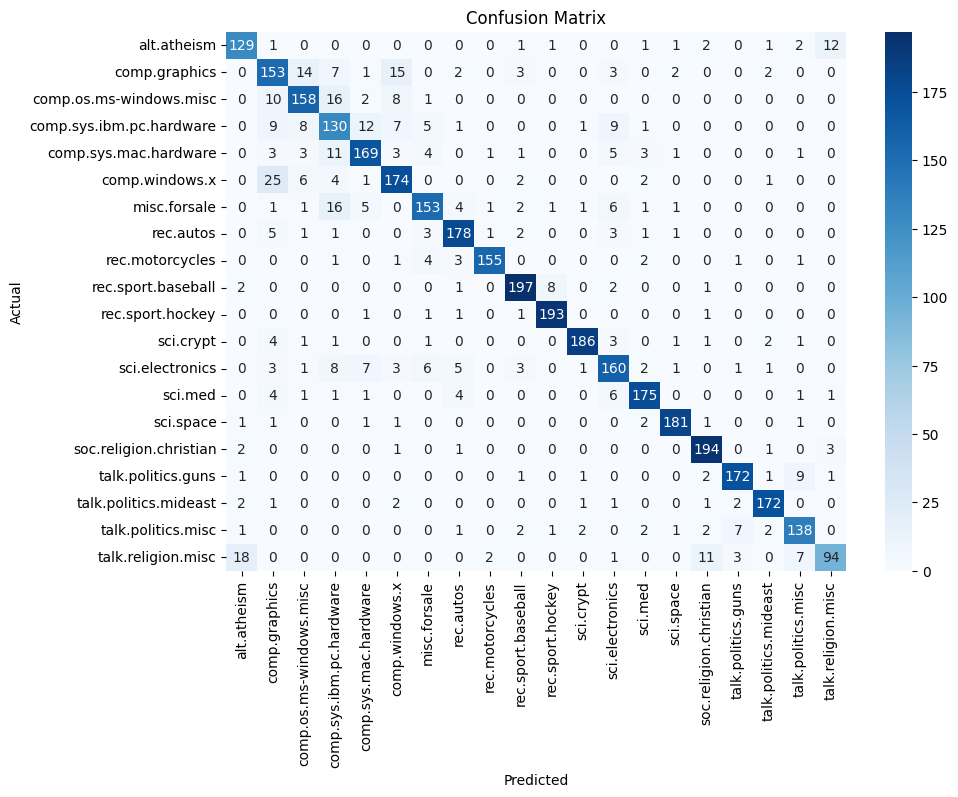

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_new_text(model, vectorizer, text):
    text_processed = preprocess_text(text)
    text_vectorized = vectorizer.transform([text_processed])
    prediction = model.predict(text_vectorized)
    # print(prediction)
    category_name = newsgroups.target_names[prediction[0]]

    return category_name

In [22]:
predicted_category = predict_new_text(model, vectorizer, "As the spacecraft drifted beyond Mars, its instruments captured breathtaking images of the asteroid belt—countless ancient rocks floating in the silent vacuum, remnants of a solar system still shaping its story.")
print("As the spacecraft drifted beyond Mars, its instruments captured breathtaking images of the asteroid belt—countless ancient rocks floating in the silent vacuum, remnants of a solar system still shaping its story.")
print(predicted_category)

[14]
As the spacecraft drifted beyond Mars, its instruments captured breathtaking images of the asteroid belt—countless ancient rocks floating in the silent vacuum, remnants of a solar system still shaping its story.
sci.space
